# Deutsch-Jozsa Algorithm
Determine a function is constant (f(0) = f(1)) or Balance (f(x) = x or f(x) = x+1 with one query

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [60]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

## Oracle

In [91]:
def getOracle(cb = None):
    if cb == "constant":
        typeO = random.randint(0,2)
    elif cb == "balanced":
        typeO = random.randint(2,4)
    else:
        typeO = random.randint(0,4)
    circ = QuantumCircuit(2)
    if typeO == 0:
        print('Initialize Constant function f(x) = 0')
        pass
    elif typeO == 1:
        print('Initialize Constant function f(x) = 1')
        circ.cx(0,1)
        circ.x(0)
        circ.cx(0,1)
    elif typeO == 2:
        print('Initialize Balanced function f(x) = x')
        circ.cx(0,1)
    else:
        print('Initialize Balanced function f(x) = x+1')
        circ.x(0)
        circ.cx(0,1)
    circ.draw();
    oracle = circ.to_gate(label = ' Oracle')
    return oracle

## Deutsch-Jozsa Algorithm

In [92]:
def deutsch_jozsa(circ):
    for i in range(0, 2):
        circ.h(i)
    circ.barrier()
    
    circ.append(getOracle(),[0,1])
    
    circ.barrier()
    for i in range(0, 2):
        circ.h(i)
    
    circ.measure(0, 0)
    result = getMeasure(circ, 1)[0][1]
    if result == '0':
        print('Measure q(0) = {} => DJ predict this is Constant function'.format(result))
    else:
        print('Measure q(0) = {} => DJ predict this is Balanced function'.format(result))
    return circ

Init state =  01
Initialize Balanced function f(x) = x+1
Measure q(0) = 1 => DJ predict this is Balanced function


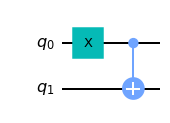

In [96]:
qc = makeCirc(2, '01')
circ = deutsch_jozsa(qc)

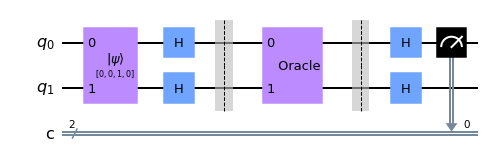

In [97]:
circ.draw();

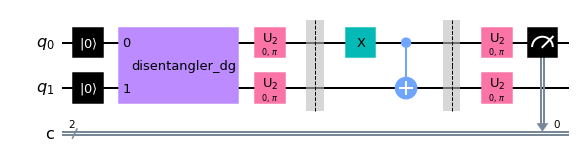

In [98]:
circ.decompose().draw();